# Documentation #001

- I am making a commitment to myself to commit a documentation by Monday mornings in order to facilitate discussions anytime on the same week.
- With the documentation it is okay to call off discussions from time to time due to whatever reasons such as travelling etc (although consistent discussions are probably more desirable). I am quite determined on this to ensure input on my side so you can expect a new document every subsequent weeks on Monday mornings.
- #001 will introduce the problem as how I understand it as of now.

## The Actuarial Problem - Loss Reserving

- In layman terms, actuaries usually work on two major things:
    - Pricing (Also called ratemaking, to calculate how much to charge customers so that the company is profitable at the same time enough to pay claims)
    - Loss reserving (The provision for unpaid claims and hence concerns the company's solvency) -> We are working on this part.
- In general, actuaries focus on the determination of the financial implications of future contingent events.
    
### Who rely on reserve estimates, their interests, and their priorities?
1. Company management: Reserve estimate should provide reliable information in order to maximize the company's viability and profitability.
2. Insurance regulator: Concerned with company's solvency, expects reserves to be set conservatively to reduce the chance of insurance company failure.
3. Tax agent: Ensures timely reporting of earned income, the reserves should reflect actual payments as "nearly as it is possible to ascertain them".
4. Policyholders (aka customers): Most concerned that reserves be adequate to pay insured cliams, but does not want to be overcharged for that assurance.

### The Claims Process
Before I get into the compartmental part I should show the claims process for it to make sense.


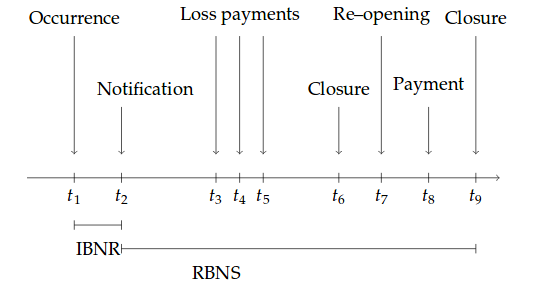

In [12]:
from IPython.display import Image
Image(filename='img/claims_process.png')

#### When an accident happens and a claim is reported to the company (Occurrence and Notification, t_1 to t_2)...
- An accident happens to an insured means the company is liable to the customer, hence the term incurred.
- If the accident happens and the insurer is not informed, then this claim is known as Incurred But Not Reported (IBNR), which may be reported after a delay.
- When a claim is reported (the company is notified), a case reserve will be opened (means an amount of money is set aside for future Loss payments, t_3 to t_5), also called as claims outstanding.
- As long as the case reserve is open, this case remains UNSETTLED, which means the company assumes that this customer will continue to file claims as a result of this accident.
- After certain amount of time, the case will be CLOSED, normally when no more claims will arise due to this particular accident (t_6).
- But there are instances where claims still come in after it is closed, so a case reserve has to be opened again to set aside money for possible payments (Re-opening, t_7 and payments at t_8).
- t_9 is the point where the case is ultimately closed and is deemed SETTLED.
- Therefore the period between t2 to t9 is called Reported But Not Settled (RBNS). The company is notified of the accident and the case is not yet closed during the period.

### Estimating Loss Reserves
Actuaries often have to satisfy all stakeholders with a single number - loss reserve, so it is best to estimate it as close to the true values as possible, but what does that mean? I must first explain the idea of ULTIMATE CLAIMS.

- An easier way to imagine this idea is, say the end of an accounting year falls on 31st December this year. We need to know the total amount of claims liable to the company at the end of year, whether paid or not, as long as it is incurred.
- But on this day of the year (17th February), we wouldn't know yet what would happen in the future. So we somewhat have to estimate the ULTIMATE value by extrapolating the development of current existing cases as well as predicting possible cases that may happen until the last day of the year, using historical data.
- Then it probably makes some sense now if I say IBNR = Ultimate - Incurred, since incurred is what the company already notified of, those are REPORTED.
- Loss reserves = Outstanding(i.e. money set aside to pay known claims) + IBNR(i.e money set aside to pay for unknown claims)
- We can probably see where the challenge lies now in order to predict loss reserves. It's the uncertainty of the future that we have to predict in order to make a provision for adverse events.

### Compartmental Models
- Compartmental models are usually tools to describe the transfer of material between components of a system over time in pharmacokinetics in the form of differential equations.
- In our case it can be used to describe the change of states of the claims, from being exposed, to being reported and finally being paid.

(p.s. Pardon me for the copy and paste work, it's quite late now and I have to leave early for registration tomorrow. Will refine my work if this is to be something formal.)


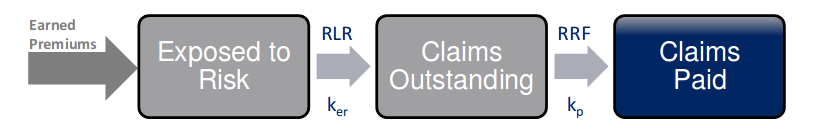

In [15]:
Image(filename='img/compartments.png')

The model is written as follows:

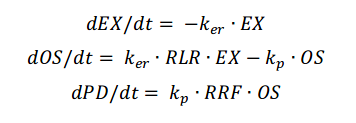

In [16]:
Image(filename='img/de.png')

- RLR = The PROPORTION of premiums that become reported claims
- RRF = The PROPORTION of outstanding claims that eventually become paid by the insurer
- k_er = The RATE at which claim events occur and are subsequently reported to the insurer
- k_p = The RATE at which outstanding claims are paid by the insurer

The brief idea here is to estimate the parameters RLR, RRF, k_er and k_p using the data so that in the end we can obtain the Ultimate Loss Ratio, ULR as ULR = RLR * RRF.
- On a side note, Ultimate Loss Ratio = (Total Paid Loss)/(Total Earned Premium)

### Hierarchical model (Mixed effects)
- The general concept of hierarchical models is that not all of the parameters in a hierarchical model are directly estimated from data. 
- Parameters that are estimated directly from the data are referred to as "fixed effects".
- Parameters that are themselves modeled, which means they are calculated from estimates of the model's hyperparameters (which are in turn estimated from data) are referred to as "random effects".
- The fact that the model consists of both modeled and non-modeled parameters gave rise to the name "mixed effects". If you find the term "hierarchical" less intuitive or just difficult to pronounce, we can stick to the term "mixed effects".

Therefore, since the model is both compartmental, and hierarchical, we call it 'hierarchical compartmental model'.

Before I carry on, I shall specify that as far as I know now, the 'random effects' in this problem are RLR and RRF, while k_er and k_p will be the 'fixed effects'. 

## Frequentist vs Bayesian
When it comes to estimating parameters using statistical methods, there will be a debate between frequentists and bayesian. In general the difference between them is that the former is a model of observation (I think it's similar to Law of Large Numbers) and the latter is a model of beliefs. But since we've already decided to work on Bayesian methods, I'll jump right into the point. However if you're interested, please allow me to direct you to this webpage that explains the debate between frequentist and bayesian methods.

https://www.probabilisticworld.com/frequentist-bayesian-approaches-inferential-statistics/

I'm also currently reading a paper entitled 'Frequentism and Bayesianism: A Python-driven Primer' by Jake VanderPlas. The author also has a presentation on this paper streamed on YouTube that is very informative: https://www.youtube.com/watch?v=KhAUfqhLakw

The code below shows the idea of the Bayes theorem using a coin flip scenario. 
(I was supposed to animate the graph to show things more clearly but since incompetence is rife (in myself), I'm leaving it as it is until one day I can squeeze out some time to turn it into something fancy.)


[1 0 0 0 0 1 0 0]


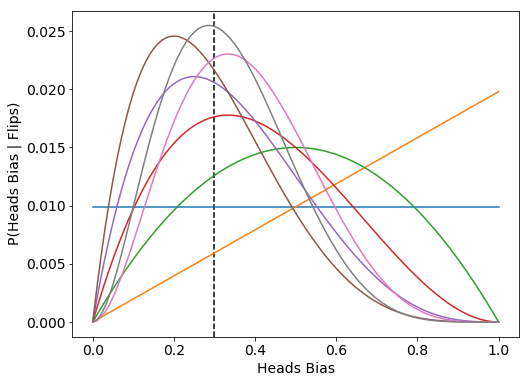

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

##########################
#     INITIALIZATION     #
##########################
# The bias of the coin    
bias_heads = 0.3

# Number of coin flips
n = 8

#################
#     PRIOR     #
#################
# The range of possible biases
length = 101
bias_range = np.linspace(0, 1, length, endpoint=True)

# Start with a uniform prior distribution
p_bias_heads = np.array(np.ones(len(bias_range)) / len(bias_range))

#########################
#     COIN FLIPPING     #
#########################
flip_series = 1 * (np.random.rand(n,) < bias_heads)
print(flip_series)

###########################################################
# Graph outline
fig = plt.figure(figsize = (8,6))
plt.axvline(bias_heads, linestyle='--', color='black')
plt.rcParams.update({'font.size':14})
plt.xlabel('Heads Bias')
plt.ylabel('P(Heads Bias | Flips)')
###########################################################

#########################################
#     UPDATING PRIOR AFTER EVERY FLIP   #
#########################################
for x in flip_series:
    
    prior = p_bias_heads
    likelihood = bias_range ** x * (1 - bias_range) ** (1 - x)
    evidence = np.sum(likelihood * prior)
    posterior = likelihood * prior / evidence
    plt.plot(bias_range,p_bias_heads)
    p_bias_heads = posterior



- The dotted line illustrates the 'true' bias of 0.3. 
- At the beginning before any flips take place, we assume that all the bias has equal probabilities, hence the horizontal blue line. - As we gain more information after a couple of flips, we update the distribution of our beliefs. 
- This graph only shows simulations of up to 8 flips, and yet we can already observe how the areas under the curves slowly concentrates around the dotted line. 
- As we tend to belief more that the bias is around 0.3, we belief less of other values. Hence the peak of the graphs are getting taller around 0.3 at the expense of other values (the lower regions)

The graph underneath is the result of 5000 flips. The area under the curve now concentrates at the bias of 0.3. We can say that we are almost certain that the true value of the bias is around 0.3.

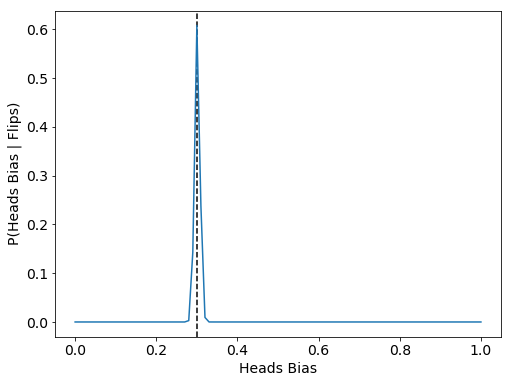

In [5]:
# when n = 5000

- Analogous to the coinflip scenario, we should be able to predict the random effects using Bayesian methods, which will be my next course of work.
- I remember reading from textbooks that actuaries incorporate judgements using priors (which should be Bayesian methods) but at the moment my justification of using Bayesian methods still lingers at using data (which is itself stochastic) to estimate the parameters. I will update you on this matter as soon as I figure things out.